## EDA ##

In [1]:
# %pip install --quiet geopandas

# import libraries
import re
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import tempfile
import urllib.request
import zipfile


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

file_path = r"/content/drive/MyDrive/207 Machine Learning: Final Project/Data/regional_combined_centroids.csv"
atlas_data = pd.read_csv(file_path)
atlas_data.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,GEOID,latitude,longitude,state
0,13001950100,Georgia,Appling County,0,3190,1270,0,34,1.07,0,...,0,5,86,104,68,164,13001950100,31.878017,-82.270221,GA
1,13001950400,Georgia,Appling County,0,1476,606,0,0,0.00,1,...,0,10,46,38,38,96,13001950400,31.665217,-82.190726,GA
2,13001950500,Georgia,Appling County,0,3864,1493,0,0,0.00,0,...,11,36,284,394,49,246,13001950500,31.694233,-82.380489,GA
3,13003960100,Georgia,Atkinson County,0,2077,770,0,0,0.00,1,...,3,18,309,387,67,200,13003960100,31.324885,-83.024239,GA
4,13003960200,Georgia,Atkinson County,0,5053,1763,0,20,0.40,0,...,21,16,1121,1437,124,290,13003960200,31.285147,-82.879234,GA


In [5]:
atlas_data.shape # look at shape of data

(7121, 151)

In [6]:
atlas_data.info() # inspect columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Columns: 151 entries, CensusTract to state
dtypes: float64(115), int64(33), object(3)
memory usage: 8.2+ MB


In [7]:
import json

rename_path = r"/content/drive/MyDrive/207 Machine Learning: Final Project/Data/rename.json"

with open(rename_path, 'r') as f:
    rename = json.load(f)

rename_dict = {}
for col in atlas_data.columns:
    if col in rename.keys():
        rename_dict[col] = rename[col]['simplifiedName']

atlas_data.rename(columns=rename_dict, inplace=True)


In [8]:
atlas_data

,TractID,StateName,CountyName,IsUrban,Pop2010,OccupiedHousingUnits,HighGroupQuarters,GroupQuartersPopulation,GroupQuartersShare,LILA_Urban1_Rural10,...,NHPIPopulation,AIANPopulation,MultiracialPopulation,HispanicPopulation,NoVehicleHouseholds,SNAPRecipients,GEOID,latitude,longitude,state
0,13001950100,Georgia,Appling County,0,3190,1270,0,34,1.07,0,...,0,5,86,104,68,164,13001950100,31.878017,-82.270221,GA
1,13001950400,Georgia,Appling County,0,1476,606,0,0,0.00,1,...,0,10,46,38,38,96,13001950400,31.665217,-82.190726,GA
2,13001950500,Georgia,Appling County,0,3864,1493,0,0,0.00,0,...,11,36,284,394,49,246,13001950500,31.694233,-82.380489,GA
3,13003960100,Georgia,Atkinson County,0,2077,770,0,0,0.00,1,...,3,18,309,387,67,200,13003960100,31.324885,-83.024239,GA
4,13003960200,Georgia,Atkinson County,0,5053,1763,0,20,0.40,0,...,21,16,1121,1437,124,290,13003960200,31.285147,-82.879234,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,28163950100,Mississippi,Yazoo County,0,7841,1569,0,3548,45.25,1,...,4,55,442,1143,79,273,28163950100,32.880440,-90.218565,Mississippi
7117,28163950200,Mississippi,Yazoo County,1,3208,1206,0,0,0.00,0,...,0,3,27,25,104,388,28163950200,32.866890,-90.384130,Mississippi
7118,28163950300,Mississippi,Yazoo County,1,4612,1601,0,237,5.14,1,...,0,9,22,26,348,867,28163950300,32.872367,-90.408698,Mississippi
7119,28163950400,Mississippi,Yazoo County,0,1833,717,0,0,0.00,0,...,0,0,11,22,20,109,28163950400,32.733620,-90.579636,Mississippi


# Step 1: Look at how food desert vs non-food desert is split in data:

In [13]:
#distribution overall
atlas_data["LILA_Urban1_Rural10"].value_counts()
atlas_data["LILA_Urban1_Rural10"].value_counts(normalize=True)



,proportion
LILA_Urban1_Rural10,
0,0.780508
1,0.219492


note: there is imbalance but it doesnt seem awful?

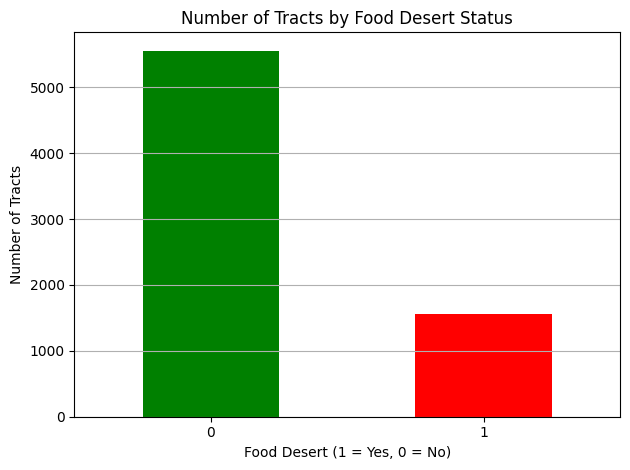

In [44]:
counts = atlas_data["LILA_Urban1_Rural10"].value_counts()

counts.plot(kind='bar', color=["green", "red"])
plt.title("Number of Tracts by Food Desert Status")
plt.xlabel("Food Desert (1 = Yes, 0 = No)")
plt.ylabel("Number of Tracts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [14]:
#distribution by state
atlas_data.groupby(["StateName", "LILA_Urban1_Rural10"]).size().unstack(fill_value=0)


LILA_Urban1_Rural10,0,1
StateName,,
Alabama,700,233
Arkansas,399,148
Georgia,969,279
Kentucky,794,122
Louisiana,648,208
Mississippi,292,162
South Carolina,702,181
Tennessee,1054,230


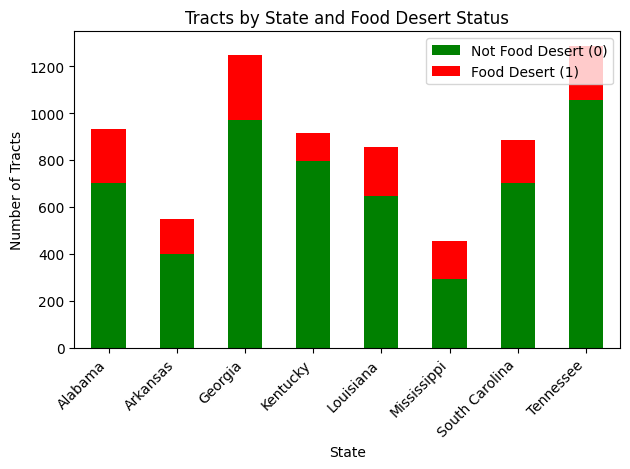

In [45]:
grouped = atlas_data.groupby(["StateName", "LILA_Urban1_Rural10"]).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, color=["green", "red"])
plt.title("Tracts by State and Food Desert Status")
plt.xlabel("State")
plt.ylabel("Number of Tracts")
plt.legend(["Not Food Desert (0)", "Food Desert (1)"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [15]:
#proportions by state

state_props = atlas_data.groupby("StateName")["LILA_Urban1_Rural10"].value_counts(normalize=True).unstack()
state_props.columns = ["% Not Food Desert", "% Food Desert"]
state_props = state_props.round(3)
state_props


,% Not Food Desert,% Food Desert
StateName,,
Alabama,0.750,0.250
Arkansas,0.729,0.271
Georgia,0.776,0.224
Kentucky,0.867,0.133
Louisiana,0.757,0.243
Mississippi,0.643,0.357
South Carolina,0.795,0.205
Tennessee,0.821,0.179


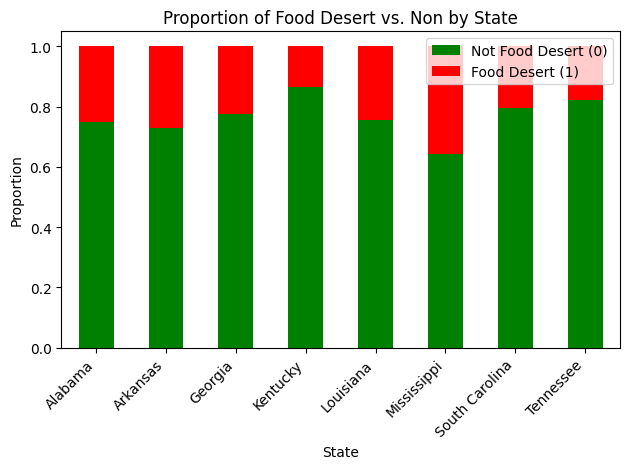

In [46]:
proportions = grouped.div(grouped.sum(axis=1), axis=0)

proportions.plot(kind='bar', stacked=True, color=["green", "red"])
plt.title("Proportion of Food Desert vs. Non by State")
plt.xlabel("State")
plt.ylabel("Proportion")
plt.legend(["Not Food Desert (0)", "Food Desert (1)"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [16]:
state_contribution = atlas_data["StateName"].value_counts(normalize=True).rename("% of Total").round(3)
state_contribution


,% of Total
StateName,
Tennessee,0.180
Georgia,0.175
Alabama,0.131
Kentucky,0.129
South Carolina,0.124
Louisiana,0.120
Arkansas,0.077
Mississippi,0.064


note: Arkansas and Mississippi may not be accurately captured in our development

# Step 2: Check Overall Data Cleanliness

In [21]:

print(atlas_data.isnull().sum().sort_values(ascending=False).to_string())



LALowIncomeShare_20Miles         7065
LAKids_20Miles                   7065
LAKidsShare_20Miles              7065
LASeniors_20Miles                7065
LASeniorsShare_20Miles           7065
LAWhiteShare_20Miles             7065
LAWhite_20Miles                  7065
LAAIANShare_20Miles              7065
LAAIAN_20Miles                   7065
LASNAP_20Miles                   7065
LANoVehicle_20Miles              7065
LAHispanicShare_20Miles          7065
LAHispanic_20Miles               7065
LAMultiracialShare_20Miles       7065
LAMultiracial_20Miles            7065
LAPopShare_20Miles               7065
LAPop_20Miles                    7065
LANHPIShare_20Miles              7065
LANHPI_20Miles                   7065
LAAsianShare_20Miles             7065
LAAsian_20Miles                  7065
LABlackShare_20Miles             7065
LABlack_20Miles                  7065
LALowIncome_20Miles              7065
LANoVehicleShare_20Miles         7056
LASNAPShare_20Miles              7056
LAWhiteShare

note: doesnt seem to be missing anything important that we'd want to use

In [22]:

atlas_data.duplicated().sum()
atlas_data["TractID"].duplicated().sum()

np.int64(0)

note: no duplicates

# Step 3: Do we have images for each tract/row?

In [31]:
!unzip "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/Alabama.zip" -d "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama"


Archive:  /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/Alabama.zip
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1001020300.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1001020400.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1001020801.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1003010200.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1003010300.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1003010400.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1003010500.jpg  
  inflating: /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/0_1003010704

In [32]:
!ls "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama"


0_1001020100.jpg  0_1069042000.jpg  0_1097005100.jpg  1_1001020700.jpg
0_1001020300.jpg  0_1069042100.jpg  0_1097005200.jpg  1_1001021000.jpg
0_1001020400.jpg  0_1071950500.jpg  0_1097005400.jpg  1_1001021100.jpg
0_1001020801.jpg  0_1071950700.jpg  0_1097005500.jpg  1_1003010100.jpg
0_1003010200.jpg  0_1071951000.jpg  0_1097005800.jpg  1_1003010600.jpg
0_1003010300.jpg  0_1073001902.jpg  0_1097005900.jpg  1_1003010906.jpg
0_1003010400.jpg  0_1073002000.jpg  0_1097006000.jpg  1_1005950100.jpg
0_1003010500.jpg  0_1073002200.jpg  0_1097006102.jpg  1_1005950300.jpg
0_1003010704.jpg  0_1073002303.jpg  0_1097006103.jpg  1_1005950400.jpg
0_1003010800.jpg  0_1073002305.jpg  0_1097006104.jpg  1_1005950800.jpg
0_1003010903.jpg  0_1073002306.jpg  0_1097006402.jpg  1_1011952100.jpg
0_1003010904.jpg  0_1073003200.jpg  0_1097006403.jpg  1_1013953000.jpg
0_1003011000.jpg  0_1073003300.jpg  0_1097006407.jpg  1_1013953100.jpg
0_1003011102.jpg  0_1073003400.jpg  0_1097006501.jpg  1_1013953200.jpg
0_1003

In [33]:
#unzip all the images

import zipfile
import os

base_path = "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures"


for state_folder in os.listdir(base_path):
    state_path = os.path.join(base_path, state_folder)
    if os.path.isdir(state_path):
        for file in os.listdir(state_path):
            if file.endswith(".zip"):
                zip_path = os.path.join(state_path, file)
                print(f"Unzipping {zip_path}...")
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(state_path)




Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Arkansas/Arkansas.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Louisiana/Louisiana.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Mississippi/Mississippi.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Tennessee/Tennesee.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Kentucky/Kentucky.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/South Carolina/South_Carolina.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Georgia/Georgia.zip...
Unzipping /content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures/Alabama/Alabama.zip...


In [34]:
import glob

image_dir = "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures"
image_files = glob.glob(f"{image_dir}/**/*.jpg", recursive=True)

print(f"Total images found: {len(image_files)}")


Total images found: 7124


note: this is approx our dataframe shape 7121 vs 7124

# Step 4: Examine where the lat/longs are grouped

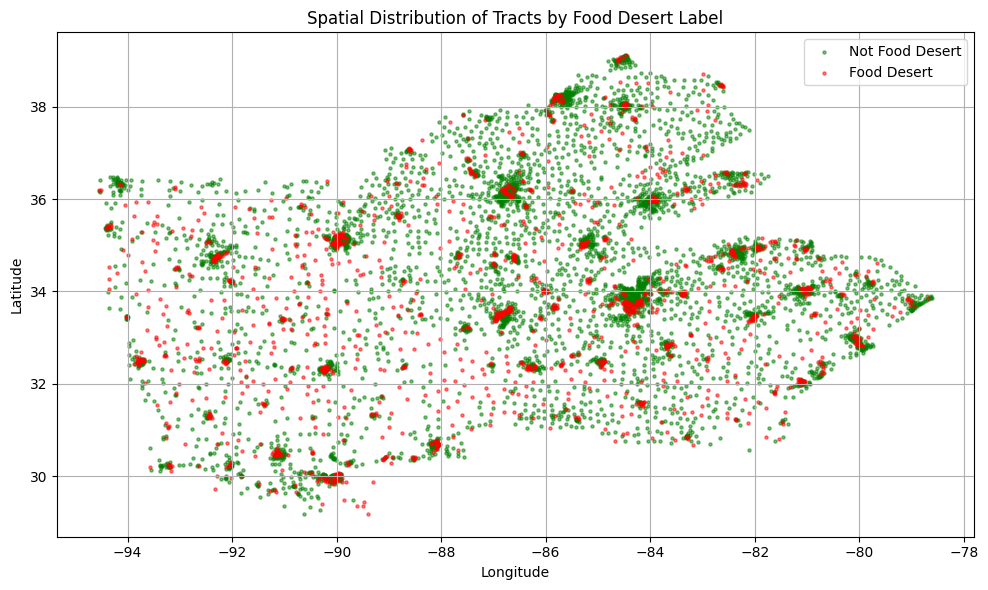

In [35]:
plt.figure(figsize=(10, 6))

colors = {0: "green", 1: "red"}
labels = {0: "Not Food Desert", 1: "Food Desert"}

for label_val in [0, 1]:
    subset = atlas_data[atlas_data["LILA_Urban1_Rural10"] == label_val]
    plt.scatter(subset["longitude"], subset["latitude"],
                s=5, c=colors[label_val], label=labels[label_val], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Tracts by Food Desert Label")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
note: so it looks like food deserts tend to be clustered together in groups. and in this scatterplot, they are more concentrated in the west
note2: it also looks like food deserts sort of surround cities?

# Step 6: Do image labels make sense?

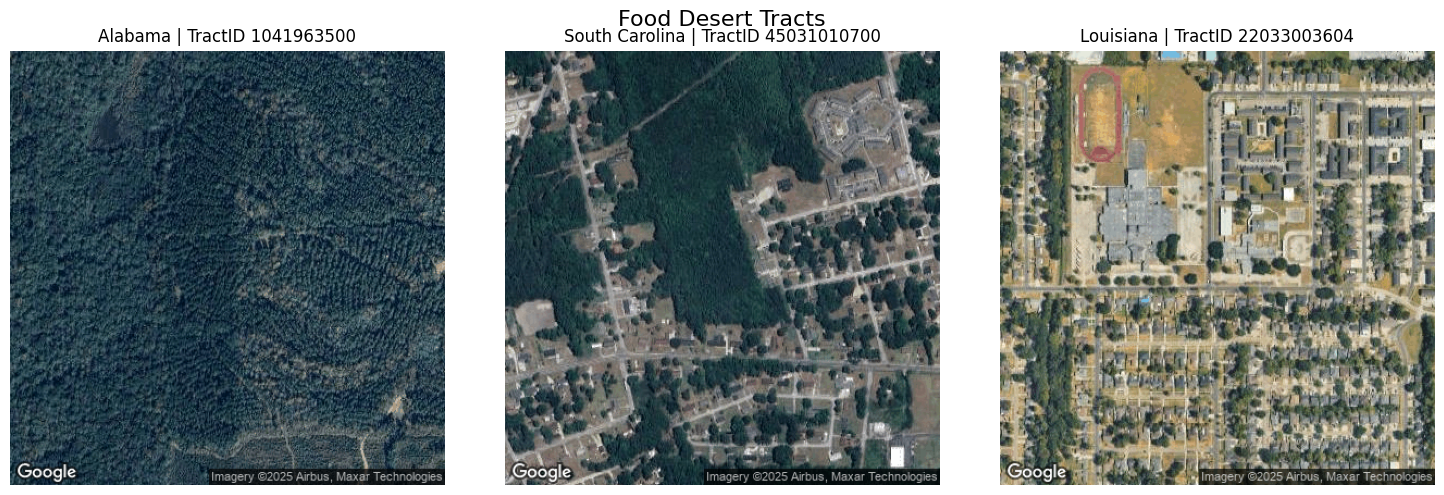

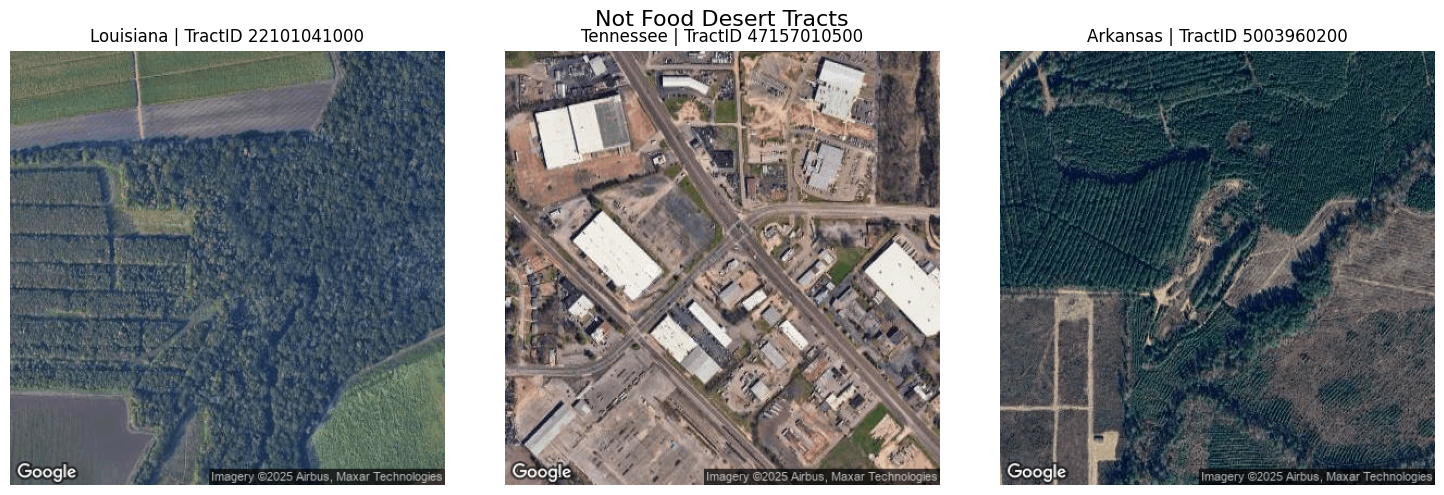

In [41]:
from PIL import Image

base_path = "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures"

# Filter by food desert or not
food_desert = atlas_data[atlas_data["LILA_Urban1_Rural10"] == 1]
non_food_desert = atlas_data[atlas_data["LILA_Urban1_Rural10"] == 0]

def show_examples(df, label, n=3):
    samples = df.sample(n)
    fig, axs = plt.subplots(1, n, figsize=(15, 5))
    fig.suptitle(f"{label} Tracts", fontsize=16)

    for i, (_, row) in enumerate(samples.iterrows()):
        tract = str(row["TractID"])
        label_val = int(row["LILA_Urban1_Rural10"])
        state = row["StateName"] if "StateName" in row else row["StateName"]
        img_name = f"{label_val}_{tract}.jpg"
        img_path = os.path.join(base_path, state, img_name)

        if os.path.exists(img_path):
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(f"{state} | TractID {tract}")
        else:
            axs[i].text(0.5, 0.5, 'Missing', ha='center', va='center')
            axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# inspect
show_examples(food_desert, "Food Desert")
show_examples(non_food_desert, "Not Food Desert")


note: not going to lie....i dont think these all visually check out

# Step 7: Check out Image Sizing

In [47]:

image_root = "/content/drive/MyDrive/207 Machine Learning: Final Project/Data/Pictures"

#get every image
image_paths = []
for root, dirs, files in os.walk(image_root):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

#create function to get dimensions
def get_dims(file):
    try:
        im = Image.open(file)
        arr = np.array(im)
        #return the height, width, and channels
        return arr.shape
    except:
        return None

# sample
dims = [get_dims(p) for p in image_paths[:500]]
dims = [d for d in dims if d is not None]

# Count dimension frequencies
from collections import Counter
Counter(dims)


Counter({(400, 400): 500})

Next Steps:
-resize images and normalize pixel values (like in the last homework)